In [1]:
import gains as genetic
import pandas as pd
import rdkit
import pickle
from rdkit.Chem import Draw
from rdkit import RDConfig
from rdkit.Chem import FragmentCatalog
from rdkit import RDConfig
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import ShowMol
import random
import unittest
import datetime

0.6098654708520179
CCCCCCCCN1C=C[N+](=C1)C	0.6098654708520179	starting structure	0:00:00.005290
CCCCCCCCn1cc[n+](C)c1CCCC	0.6678200692041523	add_custom_fragment	0:00:00.014295
CCCCCCCn1cc[n+](C)c1CCCC	0.6701388888888888	remove_atom	0:00:00.259591
CCCCCCn1cc[n+](C)c1CCCC	0.6724738675958188	remove_atom	0:00:00.292061
CCCCCn1cc[n+](C)c1CCCC	0.6771929824561403	remove_atom	0:00:00.527082
CCCCCn1cc[n+](C)c1CCC	0.6942446043165468	remove_atom	0:00:00.719264
CCCCn1cc[n+](C)c1CCC	0.7174721189591078	remove_atom	0:00:00.757970
CCCCn1cc[n+](C)c1CC	0.7628458498023716	remove_atom	0:00:00.808428
CCCCn1cc[n+](C)c1C	0.9146919431279621	remove_atom	0:00:00.916241
CCCn1cc[n+](C)c1C	1.0	remove_atom	0:00:01.006102
number of atoms: 	10
mutation attempts: 	541


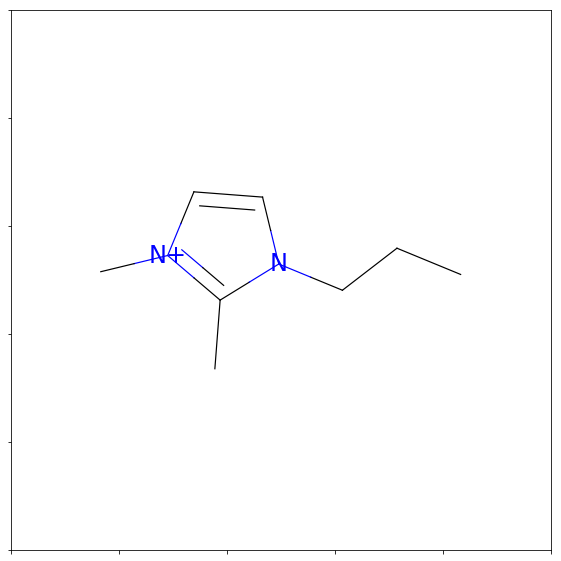

In [3]:
def guess_password(target):
    startTime = datetime.datetime.now()

    def fnGetFitness(genes):
        return get_fitness(genes, target)

    def fnDisplay(candidate, mutation):
        display(candidate, mutation, startTime)

    def fnShowIon(mutation_attempts):
        show_ion(target, mutation_attempts)

    optimalFitness = get_fitness(target, target)
    best = genetic.get_best(fnGetFitness,\
        optimalFitness, geneSet, fnDisplay,\
                    fnShowIon, target)
    
def display(candidate, mutation, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{}\t{}\t{}\t{}".format(
    candidate.Genes, candidate.Fitness, mutation, timeDiff))
    
def get_fitness(genes, target):
    ms = [Chem.MolFromSmiles(target), Chem.MolFromSmiles(genes)]
    fps = [FingerprintMols.FingerprintMol(x) for x in ms]
    return DataStructs.FingerprintSimilarity(fps[0],fps[1])

def show_ion(target, mutation_attempts):
    mol = Chem.MolFromSmiles(target)
    print("{}\t{}".format("number of atoms: ", mol.GetNumAtoms()))
    print("{}\t{}".format("mutation attempts: ", mutation_attempts))
    

geneSet = genetic.generate_geneset()
df = genetic.load_data("saltInfo.csv")
df = df.loc[df["cation_name"].str.contains("imid", case=False)]
df = df['cation_SMILES'].unique()
ohPickMe = random.sample(range(df.shape[0]),1)
target = df[ohPickMe[0]]
guess_password(target)
Draw.MolToMPL(Chem.MolFromSmiles(target))

In [26]:
model = load_data("viscosity_nn_model.sav", pickleFile=True)

/home/wesley/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [23]:
from os.path import join
def load_data(data_file_name, pickleFile=False):
    """Loads data from module_path/data/data_file_name.
    Parameters
    ----------
    data_file_name : String. Name of csv file to be loaded from
    module_path/data/data_file_name. For example 'salt_info.csv'.
    Returns
    -------
    data : Pandas DataFrame
        A data frame. For example with each row representing one 
        salt and each column representing the features of a given 
        salt.
    """
    module_path = "/home/wesley/Dropbox/Python/py3/gains/gains"
    if pickleFile:
        with open(join(module_path, 'data', data_file_name), 'rb') as pickle_file:
            data = pickle.load(pickle_file, encoding='latin1')
    else:
        with open(join(module_path, 'data', data_file_name)) as csv_file:
            data = pd.read_csv(csv_file)
    return data

In [3]:
model = pickle.load()
def get_fitness(genes, target):
    ms = [Chem.MolFromSmiles(target), Chem.MolFromSmiles(genes)]
    fps = [FingerprintMols.FingerprintMol(x) for x in ms]
    return DataStructs.FingerprintSimilarity(fps[0],fps[1])